# Homework 1
***
**Name**: Jonathan Goins 
***

This assignment is due on Canvas by **09:30am on Thursday September 8th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.

The rules to be followed for the assignment are:

- Do **NOT** load or use any Python packages that are not available in Anaconda for Python 3.9. 
- Some problems with code may be autograded.  If we provide a function or class API **do not** change it.
- Do not change the location of the data or data directory.  Use only relative paths to access the data. 

In [12]:
import argparse
import pandas as pd
import numpy as np
import pickle
from pathlib import Path

### Problem 1
***

The Function below should return the following attributes for the values within range [range_min, range_max] (both sides inclusive) in the ith column which are: 
- Number of objects
- The minimum value
- The maximum value
- The mean value
- The standard deviation value
- The Q1 value
- The median value
- The Q3 value
- The IQR value

Note:
- The data file is already at "data/dataset.csv". Please maintain this as it would be necessary while grading. You don't need to download it yourself
- Do not change the variable names of the returned values.
- After calculating each of those values, assign them to the corresponding value that is being returned.
- The col_ind can range from 0 - 8
- ONLY consider the values within [range_min, range_max] (both sides are INCLUSIVE) 

For example, if a column has value 1,2,3,4,5,6 and [range_min, range_max] = [2,4], only the values 2,3,4 will be used to calculate the attributes.

In [13]:
def calculate(dataFile, col_num, range_min, range_max):
    """
    Input Parameters:
        dataFile: The dataset file (in csv).
        col_num: The index of the column for which the various properties will be calculated.
        [range_min, range_max]: the range of the values to be considered for calculation
    Default value of 0,infinity,-infinity are assigned to all the variables as required. 
    """

    data = pd.read_csv("data/dataset.csv")
    numObj, minValue, maxValue, mean, stdev, Q1, median, Q3, IQR = [0,"inf","-inf",0,0,0,0,0,0]
    col_of_interest = data.iloc[:,col_num]
    test = []
    for number in col_of_interest:
        if (number <= range_max and number >= range_min):
            test.append(number)
    numObj = len(test)
    mean = np.mean(test)
    Q1 = np.quantile(test, 0.25)
    Q3 = np.quantile(test, 0.75)
    IQR = (Q3 - Q1)
    maxValue = np.max(test)
    median = np.median(test)
    minValue = np.min(test)
    stdev = np.std(test,ddof = 1)
    #YOUR TASK: Write code to assign the values to the respective variables.

    return numObj, minValue, maxValue, mean, stdev, Q1, median, Q3, IQR

### Here are the unit tests. You don't need to modify them. Simply execute the cell and observe the output.

In [14]:
import unittest

class TestAttr(unittest.TestCase):
    def setUp(self):
        self.loc = "data/dataset.csv"
        file = open('data/testing', 'rb')
        self.data = pickle.load(file)
        file.close()
    
    def test0(self):
        """
        Test calculation result
        """
        column, range_min, range_max = self.data[0]
        result = calculate(self.loc, column, range_min, range_max)
        self.assertEqual(result[0],self.data[1][0])
        self.assertAlmostEqual(result[1],self.data[1][1], places = 1)
        self.assertAlmostEqual(result[2],self.data[1][2], places = 1)
        self.assertAlmostEqual(result[3],self.data[1][3], places = 1)
        self.assertAlmostEqual(result[4],self.data[1][4], places = 1)
        self.assertAlmostEqual(result[5],self.data[1][5], places = 1)
        self.assertAlmostEqual(result[6],self.data[1][6], places = 1)
        self.assertAlmostEqual(result[7],self.data[1][7], places = 1)
        self.assertAlmostEqual(result[8],self.data[1][8], places = 1)

tests = TestAttr()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

.
----------------------------------------------------------------------
Ran 1 test in 0.224s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

### [Part B] Scatter Plot. Use the cell below to add your code

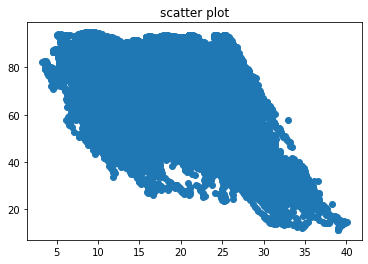

In [15]:
import matplotlib.pyplot as plt
data = pd.read_csv("data/dataset.csv")
col1 = data.iloc[:,1]
col2 = data.iloc[:,2]
plt.scatter(col1, col2)
plt.title('scatter plot')
plt.show()